<a href="https://colab.research.google.com/github/DiegoRodriguez25/IA_Project/blob/main/Proyecto_IA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de precios de celulares**
---

Este proyecto se centra en la clasificación de precios de smartphones a partir de sus características físicas y técnicas. El conjunto de datos incluye atributos como:



*   Capacidad de la batería
*   Presencia de Bluetooth
*   Conectividad WiFi
*   Velocidad del procesador o clock speed
*   Megapíxeles de la cámara frontal

Entre otras especificaciones relevantes

En base a estas características, se entrenará un modelo de clasificación supervisada que asignará cada dispositivo a uno de los siguientes rangos de precio:

0 → Bajo costo

1 → Costo medio

2 → Costo alto

3 → Costo muy alto

De esta manera, el modelo podrá predecir el rango de precio de un smartphone a partir de sus especificaciones técnicas.



In [ ]:
# @title Importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# @title Carga de los datasets (CSV)
id_df = '1WV5xKqZTG5fPpVkIprLpB6DPCH6VMJFz'  # Nuevo ID del archivo
link_df = f'https://drive.google.com/uc?id={id_df}'

df = pd.read_csv(link_df)


In [ ]:
# @title Descripción del Dataset (sin modificar)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


---
## Preprocesamiento de datos

In [ ]:
# @title Eliminacion de columna
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# @title Eliminacion de datos nulos
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


---
# **Series del Dataframe**

## **battery_power**

Energía total que una batería puede almacenar de una sola vez, medida en mAh.

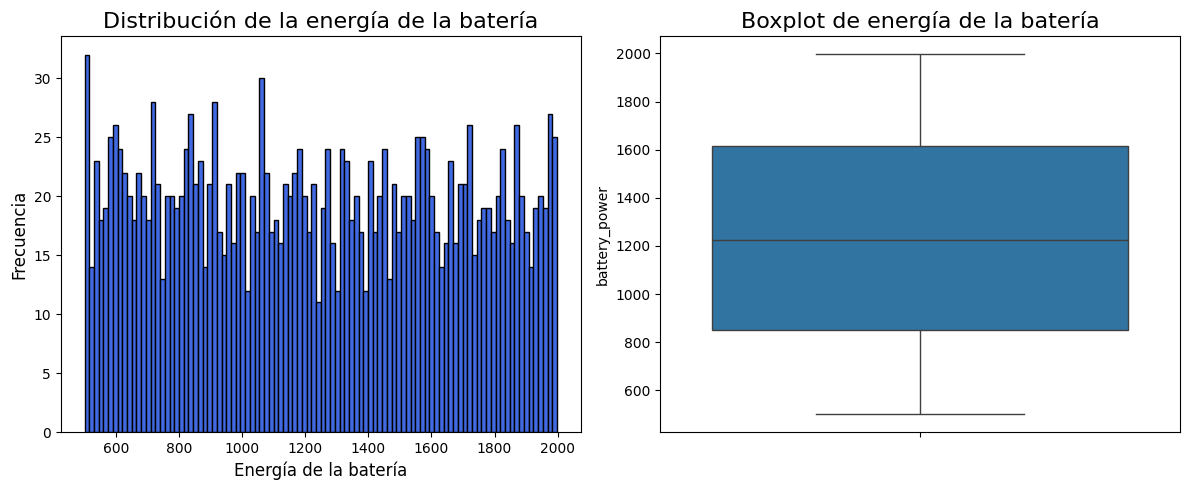

In [ ]:
# @title Histograma y Boxplot energía de la batería (battery_power)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['battery_power'], bins=100, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de la energía de la batería', fontsize=16)
axes[0].set_xlabel('Energía de la batería', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='battery_power', ax=axes[1])
axes[1].set_title('Boxplot de energía de la batería', fontsize=16)

plt.tight_layout()
plt.show()

## **blue**
Esta columna nos indica si el movil cuenta con la presencia de Bluetooth o no

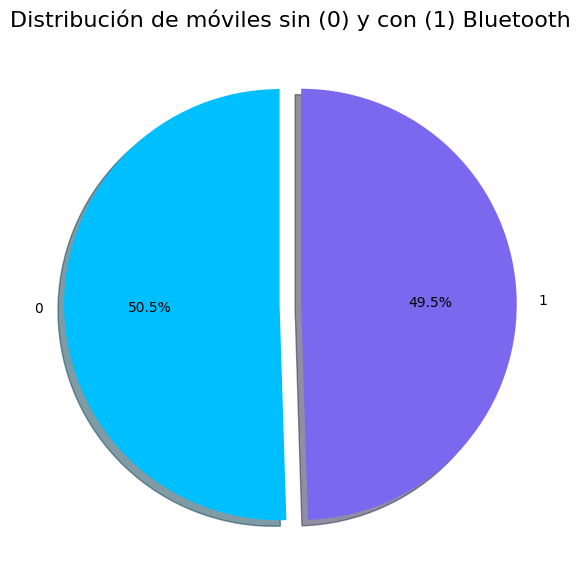

In [ ]:
# @title Gráfico de barra para blue

modes = df['blue'].value_counts().sort_index()
mode_labels = ['0', '1']

plt.figure(figsize=(7, 7))
plt.pie(
    modes,
    labels=mode_labels,
    autopct='%1.1f%%',
    colors=['deepskyblue', 'mediumslateblue'],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)

plt.title('Distribución de móviles sin (0) y con (1) Bluetooth', fontsize=16)
plt.show()

## **Clock_speed**
Indica la velocidad a la que el microprocesador ejecuta instrucciones

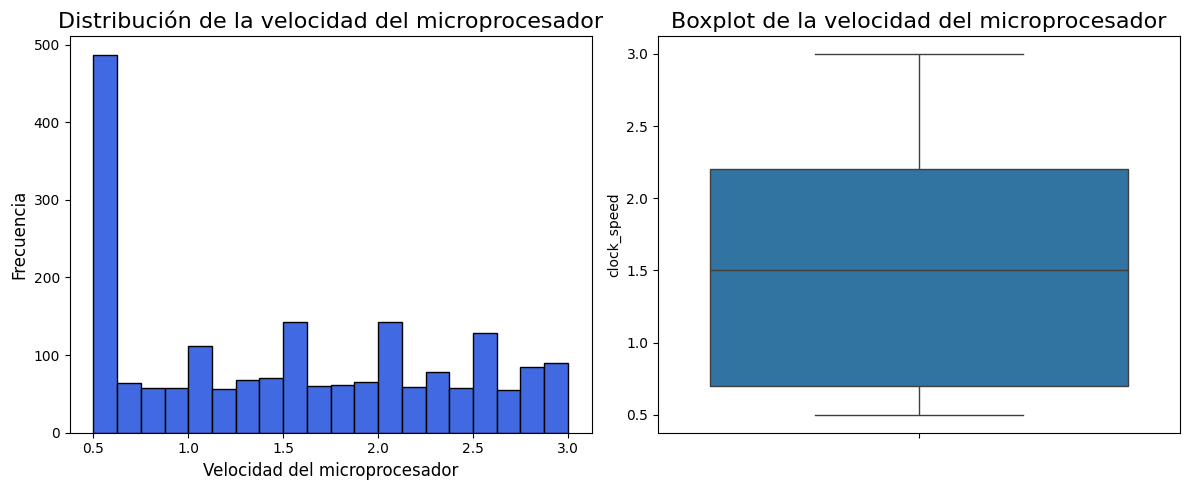

In [ ]:
# @title Histograma y Boxplot velocidad del microprocesador (clock_speed)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['clock_speed'], bins=20, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de la velocidad del microprocesador', fontsize=16)
axes[0].set_xlabel('Velocidad del microprocesador', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='clock_speed', ax=axes[1])
axes[1].set_title('Boxplot de la velocidad del microprocesador', fontsize=16)

plt.tight_layout()
plt.show()

## **dual_sim**
Esta columna nos indica si el movil presenta doble sim

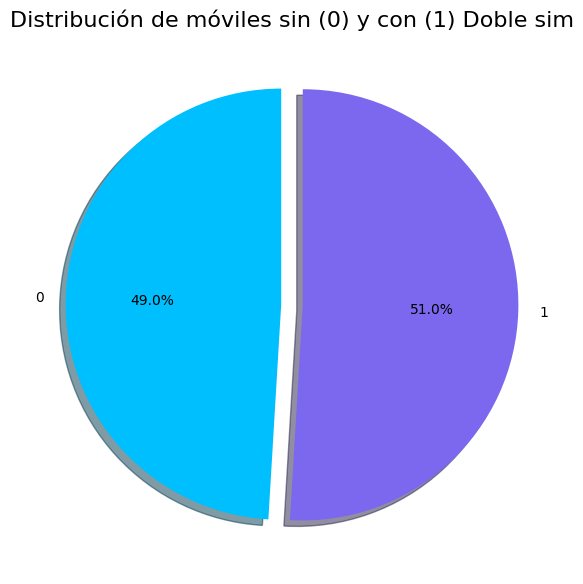

In [ ]:
# @title Gráfico de barra para doble sim

modes = df['dual_sim'].value_counts().sort_index()
mode_labels = ['0', '1']

plt.figure(figsize=(7, 7))
plt.pie(
    modes,
    labels=mode_labels,
    autopct='%1.1f%%',
    colors=['deepskyblue', 'mediumslateblue'],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)

plt.title('Distribución de móviles sin (0) y con (1) Doble sim', fontsize=16)
plt.show()

## **fc**
Nos indica los pixeles que presenta la camara frontal en mega pixeles

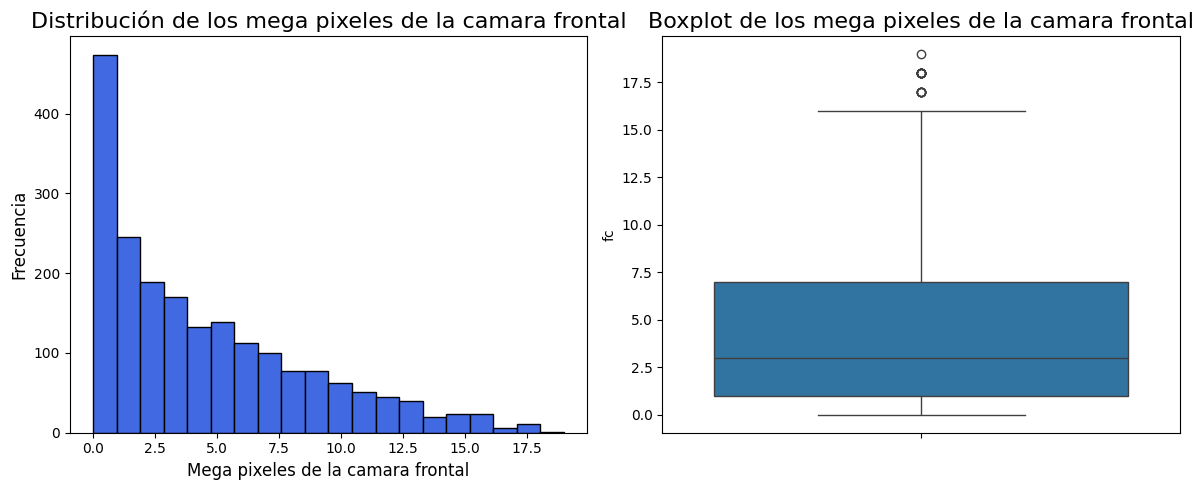

In [ ]:
# @title Histograma y Boxplot mega pixeles de la camara frontal (fc)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['fc'], bins=20, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de los mega pixeles de la camara frontal', fontsize=16)
axes[0].set_xlabel('Mega pixeles de la camara frontal', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='fc', ax=axes[1])
axes[1].set_title('Boxplot de los mega pixeles de la camara frontal', fontsize=16)

plt.tight_layout()
plt.show()

## **four_g**
Esta columna nos indica si el movil presenta red 4G

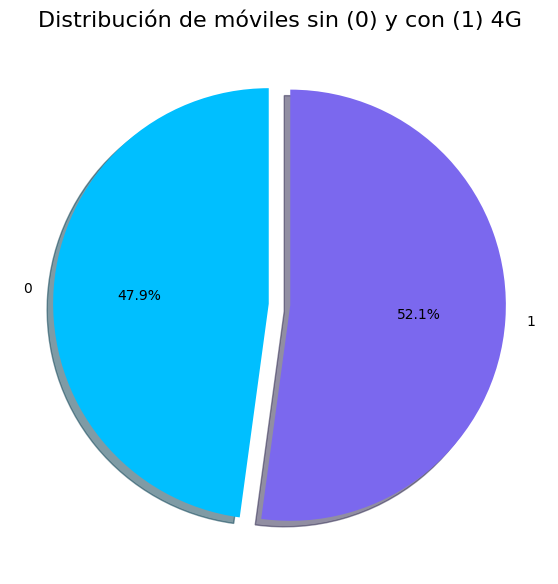

In [ ]:
# @title Gráfico de barra para 4G

modes = df['four_g'].value_counts().sort_index()
mode_labels = ['0', '1']

plt.figure(figsize=(7, 7))
plt.pie(
    modes,
    labels=mode_labels,
    autopct='%1.1f%%',
    colors=['deepskyblue', 'mediumslateblue'],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)

plt.title('Distribución de móviles sin (0) y con (1) 4G', fontsize=16)
plt.show()

## **int_memory**
Indica la memoria interna del movil en gigabytes

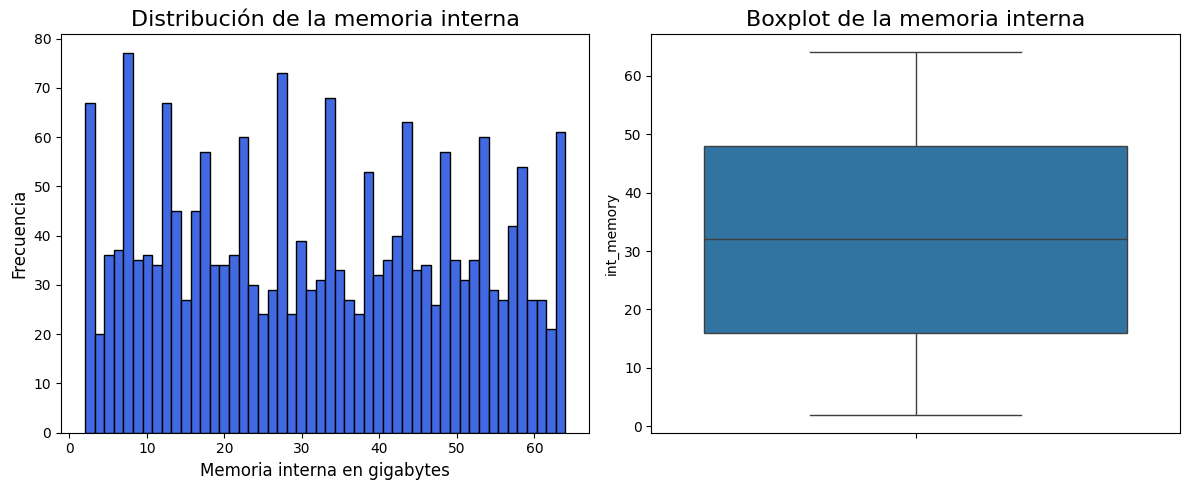

In [ ]:
# @title Histograma y Boxplot para la memoria interna
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['int_memory'], bins=50, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de la memoria interna', fontsize=16)
axes[0].set_xlabel('Memoria interna en gigabytes', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='int_memory', ax=axes[1])
axes[1].set_title('Boxplot de la memoria interna', fontsize=16)

plt.tight_layout()
plt.show()

## **m_dep**
Nos indica la profundidad del celular en cm

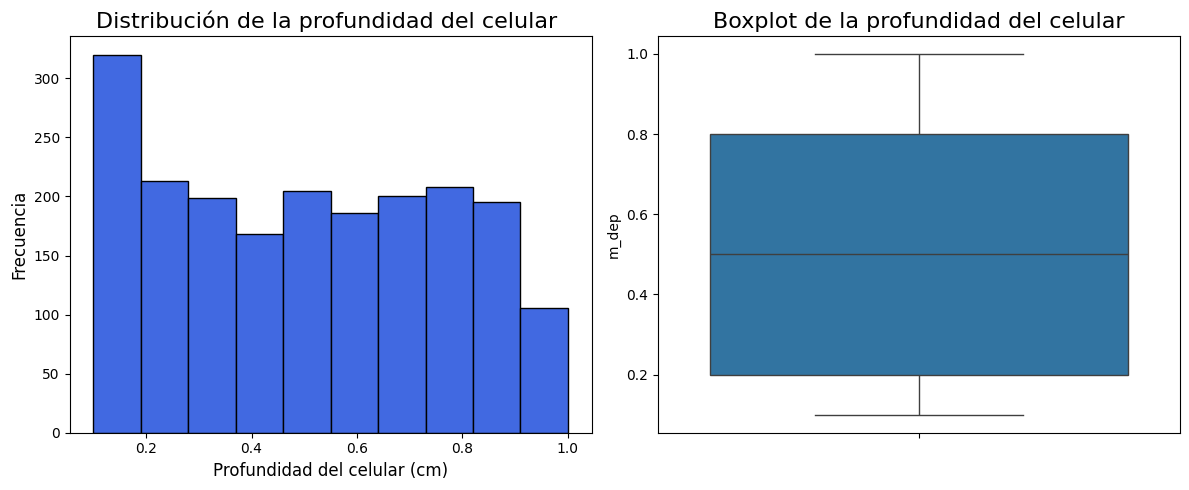

In [ ]:
# @title Histograma y Boxplot para la profundidad del celular
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['m_dep'], bins=10, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de la profundidad del celular ', fontsize=16)
axes[0].set_xlabel('Profundidad del celular (cm)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='m_dep', ax=axes[1])
axes[1].set_title('Boxplot de la profundidad del celular', fontsize=16)

plt.tight_layout()
plt.show()

## **mobile_wt**
Esta columna nos indica el peso del celular

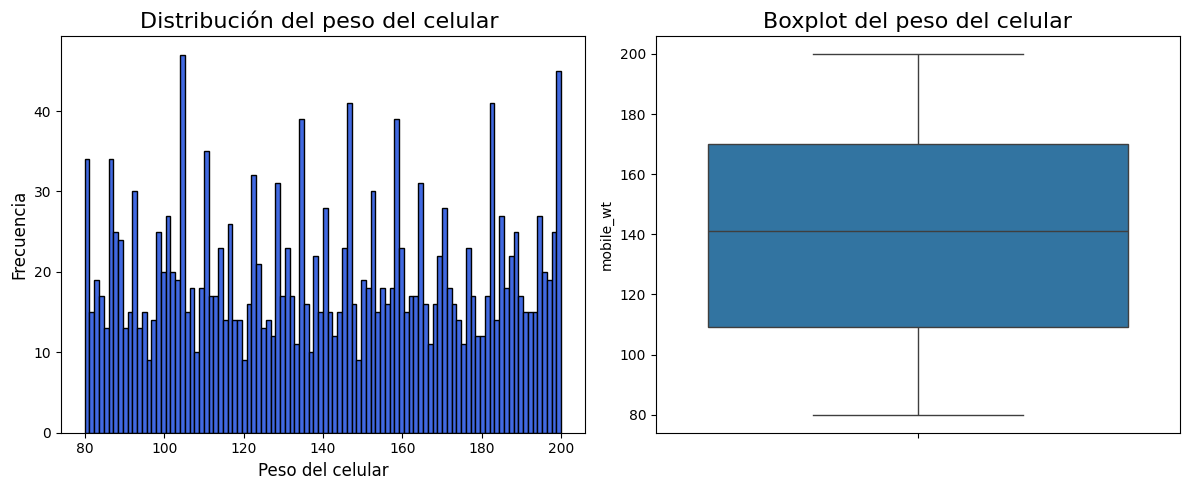

In [ ]:
# @title Histograma y Boxplot para el peso del celular
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['mobile_wt'], bins=100, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución del peso del celular ', fontsize=16)
axes[0].set_xlabel('Peso del celular', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='mobile_wt', ax=axes[1])
axes[1].set_title('Boxplot del peso del celular', fontsize=16)

plt.tight_layout()
plt.show()

## **n_cores**
Nos indica el numeros de nucleos que tiene el procesador

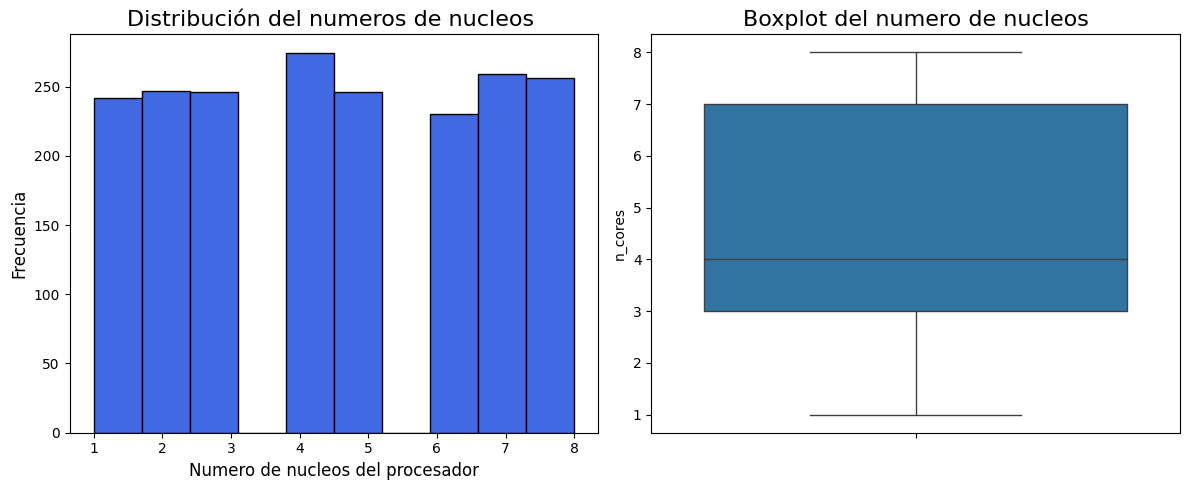

In [ ]:
# @title Histograma y Boxplot para numeros de nucleos del procesador
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['n_cores'], bins=10, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución del numeros de nucleos ', fontsize=16)
axes[0].set_xlabel('Numero de nucleos del procesador', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='n_cores', ax=axes[1])
axes[1].set_title('Boxplot del numero de nucleos', fontsize=16)

plt.tight_layout()
plt.show()

## **pc**
Esta columna nos indica los pixeles de la camara principal en mega pixeles

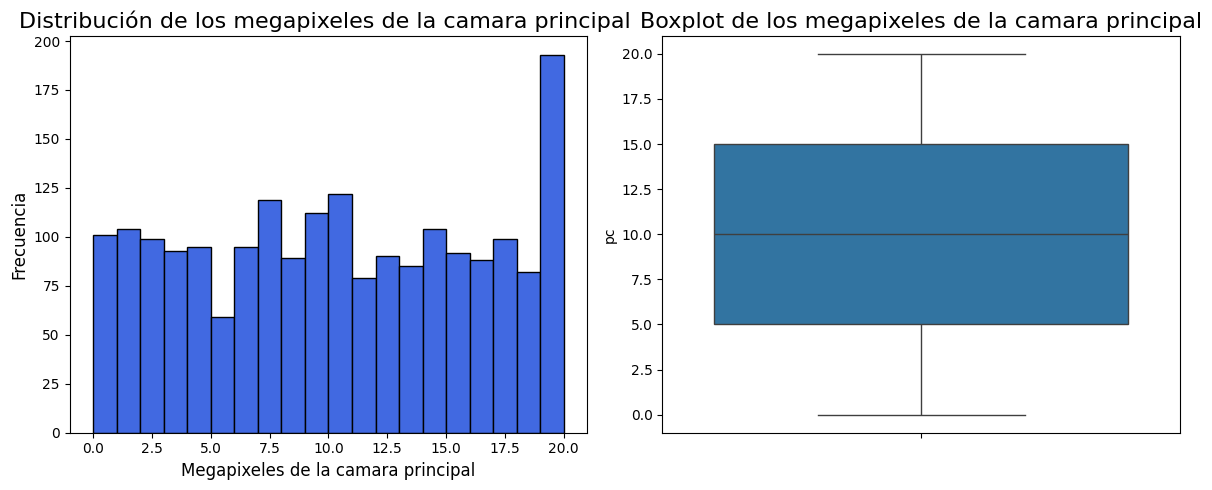

In [ ]:
# @title Histograma y Boxplot para los megapixeles de la camara principal
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['pc'], bins=20, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de los megapixeles de la camara principal ', fontsize=16)
axes[0].set_xlabel('Megapixeles de la camara principal', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='pc', ax=axes[1])
axes[1].set_title('Boxplot de los megapixeles de la camara principal', fontsize=16)

plt.tight_layout()
plt.show()

## **px_height**
Esta columna indica la altura de la resolución de pixeles

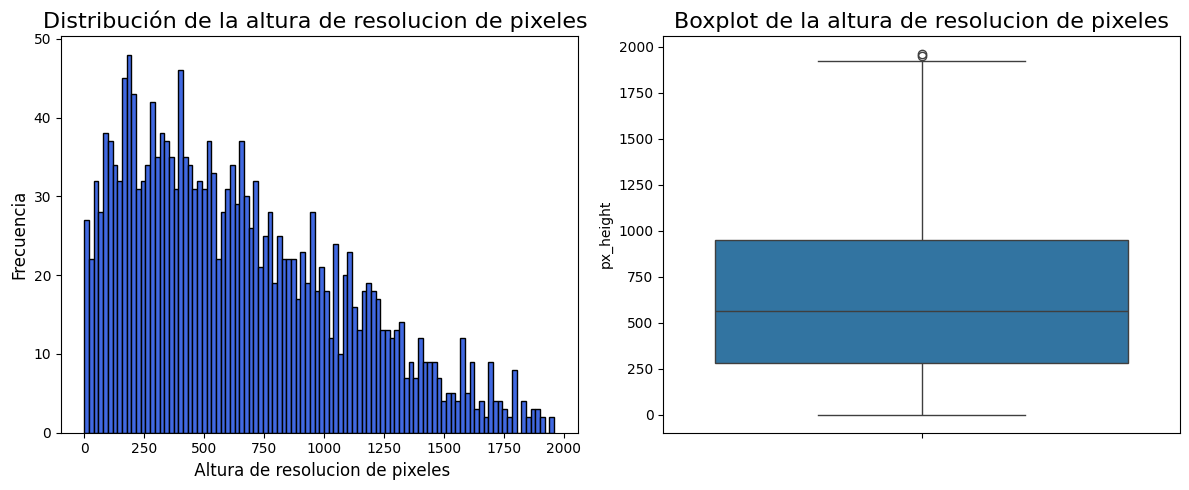

In [ ]:
# @title Histograma y Boxplot para la altura de resolucion de pixeles
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['px_height'], bins=100, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de la altura de resolucion de pixeles ', fontsize=16)
axes[0].set_xlabel(' Altura de resolucion de pixeles', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='px_height', ax=axes[1])
axes[1].set_title('Boxplot de la altura de resolucion de pixeles', fontsize=16)

plt.tight_layout()
plt.show()

## **px_width**
Esta columna nos indica el ancho de la resolución de pixeles

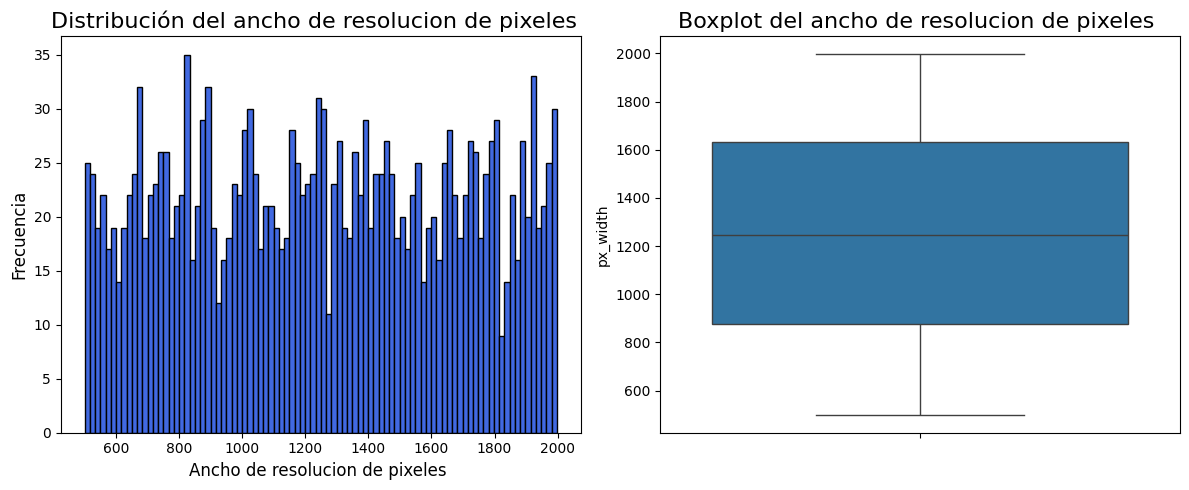

In [ ]:
# @title Histograma y Boxplot para el ancho de resolucion de pixeles
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['px_width'], bins=90, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución del ancho de resolucion de pixeles  ', fontsize=16)
axes[0].set_xlabel('Ancho de resolucion de pixeles ', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='px_width', ax=axes[1])
axes[1].set_title('Boxplot del ancho de resolucion de pixeles ', fontsize=16)

plt.tight_layout()
plt.show()

## **ram**
Esta columna indica la memoria ram en megabytes

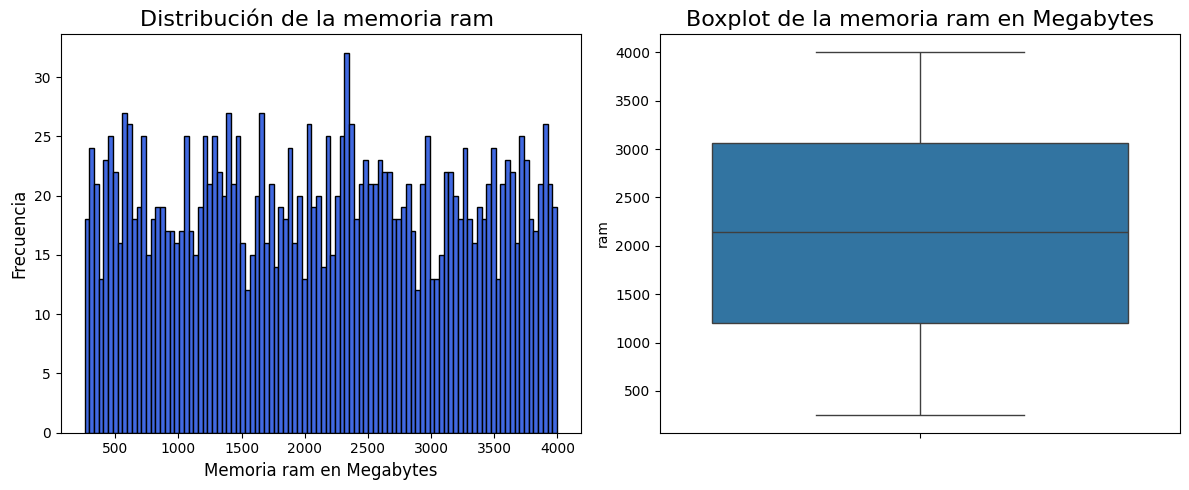

In [ ]:
# @title Histograma y Boxplot para la ram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['ram'], bins=100, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de la memoria ram ', fontsize=16)
axes[0].set_xlabel('Memoria ram en Megabytes', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='ram', ax=axes[1])
axes[1].set_title('Boxplot de la memoria ram en Megabytes', fontsize=16)

plt.tight_layout()
plt.show()

## **sc_h**
Esta columna nos indica la altura de la pantalla movil en cm


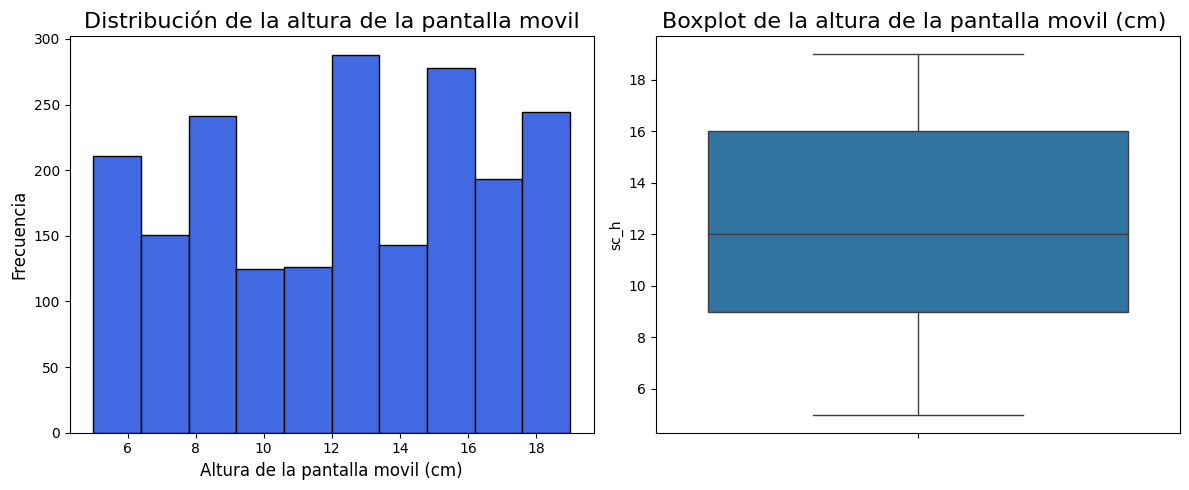

In [ ]:
# @title Histograma y Boxplot para la altura de la pantalla movil (cm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['sc_h'], bins=10, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución de la altura de la pantalla movil', fontsize=16)
axes[0].set_xlabel('Altura de la pantalla movil (cm)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='sc_h', ax=axes[1])
axes[1].set_title('Boxplot de la altura de la pantalla movil (cm) ', fontsize=16)

plt.tight_layout()
plt.show()

## **sc_w**
Esta columna nos indica el ancho pantalla movil en cm


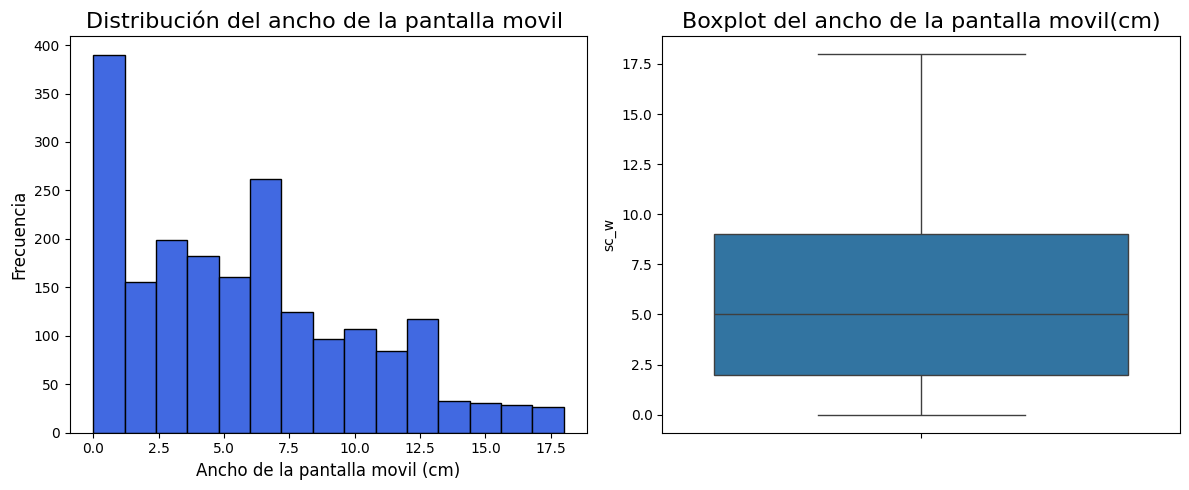

In [ ]:
# @title Histograma y Boxplot para el ancho de la pantalla movil (cm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['sc_w'], bins=15, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución del ancho de la pantalla movil ', fontsize=16)
axes[0].set_xlabel('Ancho de la pantalla movil (cm)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='sc_w', ax=axes[1])
axes[1].set_title('Boxplot del ancho de la pantalla movil(cm)', fontsize=16)

plt.tight_layout()
plt.show()

## **talk_time**
Nos indica el tiempo maximo que puede durar el movil con solo una carga

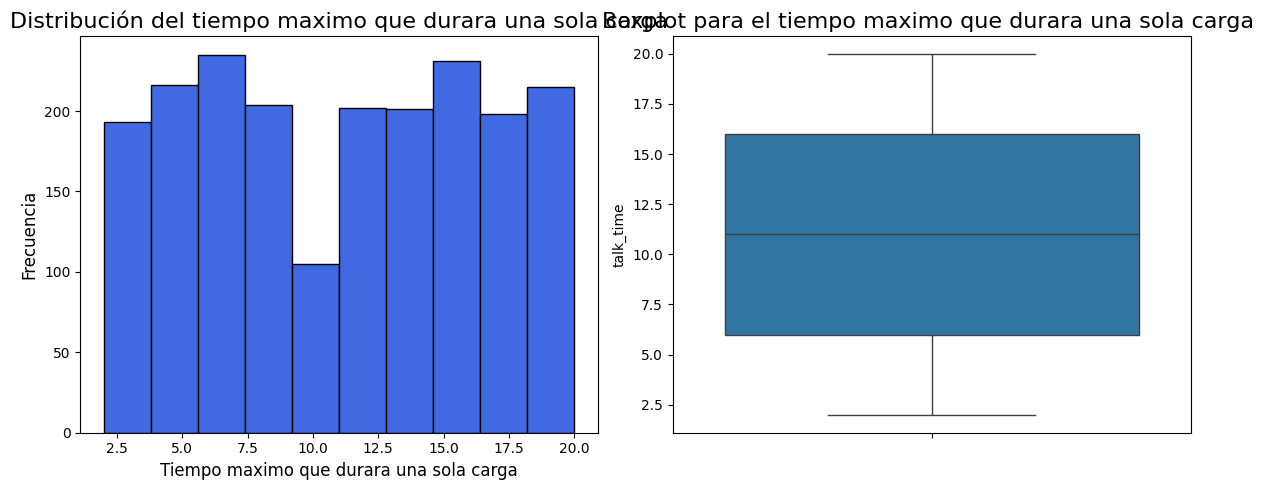

In [ ]:
# @title Histograma y Boxplot para el tiempo maximo que durara una sola carga
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df['talk_time'], bins=10, color='royalblue', edgecolor='black')
axes[0].set_title('Distribución del tiempo maximo que durara una sola carga', fontsize=16)
axes[0].set_xlabel('Tiempo maximo que durara una sola carga', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# Boxplot
sns.boxplot(data=df, y='talk_time', ax=axes[1])
axes[1].set_title('Boxplot para el tiempo maximo que durara una sola carga ', fontsize=16)

plt.tight_layout()
plt.show()

## **three_g**
Esta columna indica si el movil tiene red 3G

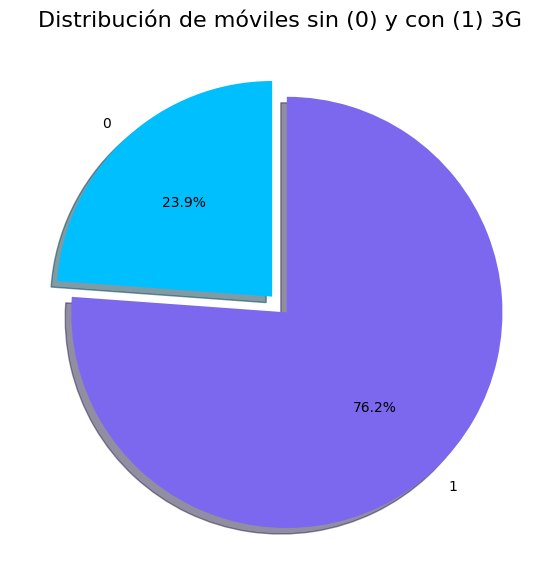

In [ ]:
# @title Gráfico de barra para 3G

modes = df['three_g'].value_counts().sort_index()
mode_labels = ['0', '1']

plt.figure(figsize=(7, 7))
plt.pie(
    modes,
    labels=mode_labels,
    autopct='%1.1f%%',
    colors=['deepskyblue', 'mediumslateblue'],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)

plt.title('Distribución de móviles sin (0) y con (1) 3G', fontsize=16)
plt.show()

## **touch_screen**
Esta columna indica si el movil tiene pantalla tactil

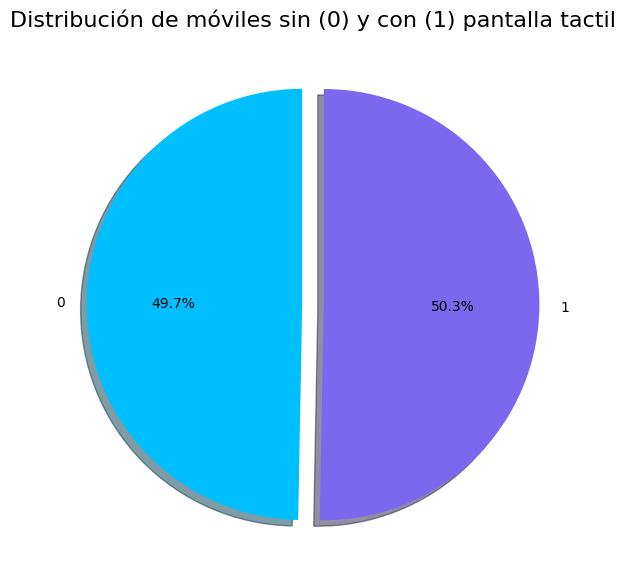

In [ ]:
# @title Gráfico de barra para pantalla tactil

modes = df['touch_screen'].value_counts().sort_index()
mode_labels = ['0', '1']

plt.figure(figsize=(7, 7))
plt.pie(
    modes,
    labels=mode_labels,
    autopct='%1.1f%%',
    colors=['deepskyblue', 'mediumslateblue'],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)

plt.title('Distribución de móviles sin (0) y con (1) pantalla tactil', fontsize=16)
plt.show()

## **wifi**
Esta columna indica si el movil tiene wifi

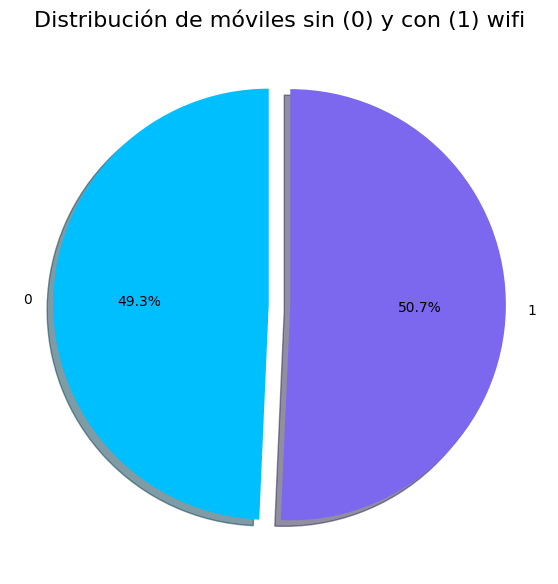

In [ ]:
# @title Gráfico de barra para Wifi

modes = df['wifi'].value_counts().sort_index()
mode_labels = ['0', '1']

plt.figure(figsize=(7, 7))
plt.pie(
    modes,
    labels=mode_labels,
    autopct='%1.1f%%',
    colors=['deepskyblue', 'mediumslateblue'],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)

plt.title('Distribución de móviles sin (0) y con (1) wifi', fontsize=16)
plt.show()

## **price_range**
Esta columna indica el rango del precio

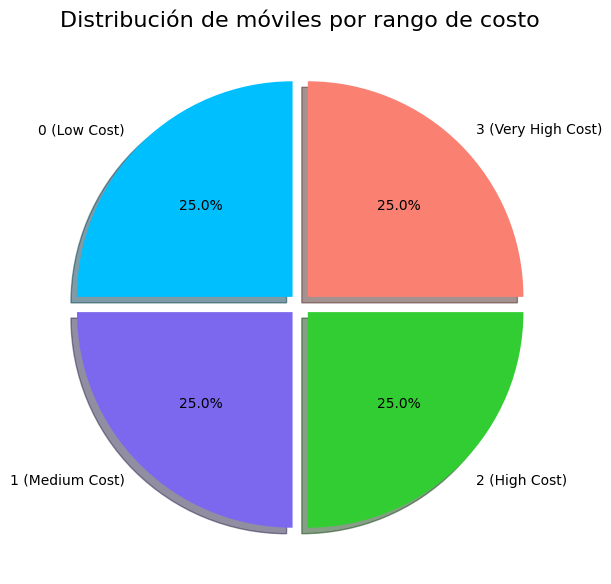

In [ ]:
import matplotlib.pyplot as plt
modes = df['price_range'].value_counts().sort_index()

mode_labels = ['0 (Low Cost)', '1 (Medium Cost)', '2 (High Cost)', '3 (Very High Cost)']

# Gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(
    modes,
    labels=mode_labels,
    autopct='%1.1f%%',
    colors=['deepskyblue', 'mediumslateblue', 'limegreen', 'salmon'],
    startangle=90,
    explode=(0.05, 0.05, 0.05, 0.05),
    shadow=True
)

plt.title('Distribución de móviles por rango de costo', fontsize=16)
plt.show()

# **PARTE 2: ENTRENAMIENTO**


In [ ]:
# @title Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

modeldt = DecisionTreeClassifier(max_depth=5)
modeldt.fit(X_train, y_train)
accuracy = accuracy_score(modeldt.predict(X_test), y_test)

print("El accuracy es: ", accuracy)

El accuracy es:  0.8375


In [ ]:
# @title Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X= df.drop('price_range', axis=1)
y= df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = RandomForestClassifier()
model.fit(X_train, y_train)
accuracy = accuracy_score(model.predict(X_test), y_test)

print("El accuracy es: ", accuracy)

El accuracy es:  0.9


In [ ]:
# @title SVC (Support vector classifier)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

X= df.drop('price_range', axis=1)
y= df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

model = SVC()
model.fit(X_train, y_train)
accuracy = accuracy_score(model.predict(X_test), y_test)

print("El accuracy es: ", accuracy)

El accuracy es:  0.9575


## **LEARNING CURVES**

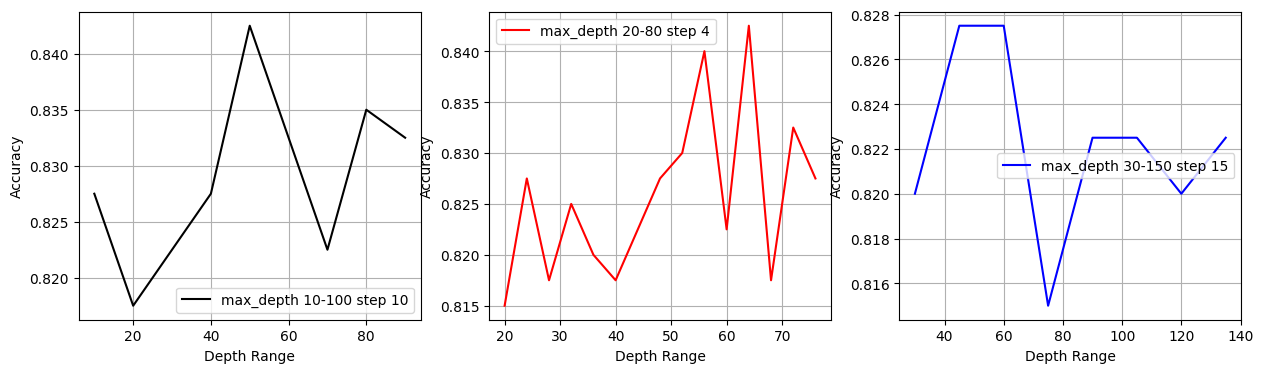

In [ ]:
# @title Decision Tree

import matplotlib.pyplot as plt

def DT_show_curve(a, b, step, col, ax):
    acc = []
    depth_range = range(a, b, step)
    for i in depth_range:
        DecisionTree = DecisionTreeClassifier(max_depth=i)
        DecisionTree.fit(X_train, y_train)
        y_pred = DecisionTree.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))

    ax.plot(depth_range, acc, label=f"max_depth {a}-{b} step {step}", color=col)
    ax.set_xlabel("Depth Range")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(True)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
DT_show_curve(10, 100, 10, 'black', axes[0])
DT_show_curve(20, 80, 4, 'red', axes[1])
DT_show_curve(30, 150, 15, 'blue', axes[2])
plt.show()


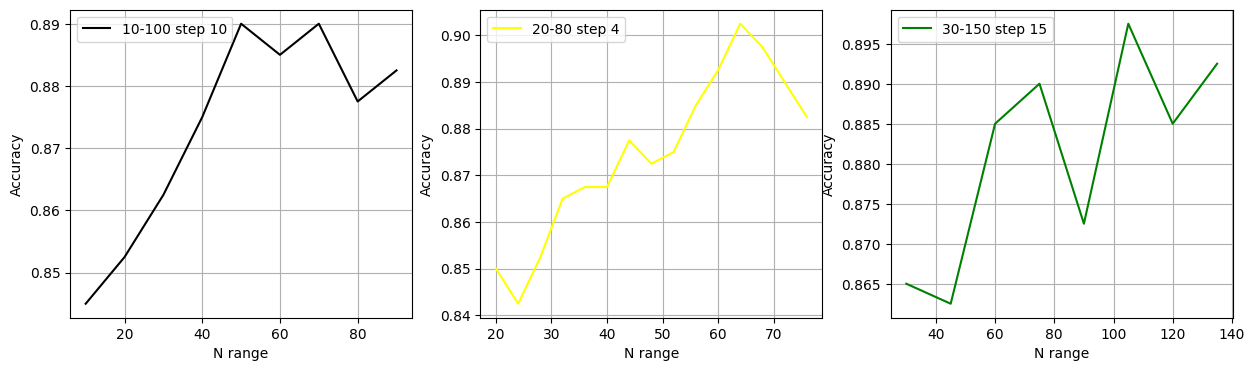

In [ ]:
# @title Random Forest
def RFC_show_curve(a, b, step, col, ax):
    acc = []
    n_range = range(a, b, step)
    for i in n_range:
        Randomforest = RandomForestClassifier(n_estimators=i)
        Randomforest.fit(X_train, y_train)
        y_pred = Randomforest.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))

    ax.plot(n_range, acc, label=f"{a}-{b} step {step}", color=col)
    ax.set_xlabel("N range")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(True)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
RFC_show_curve(10, 100, 10, 'black', axes[0])
RFC_show_curve(20, 80, 4, 'yellow', axes[1])
RFC_show_curve(30, 150, 15, 'green', axes[2])
plt.show()



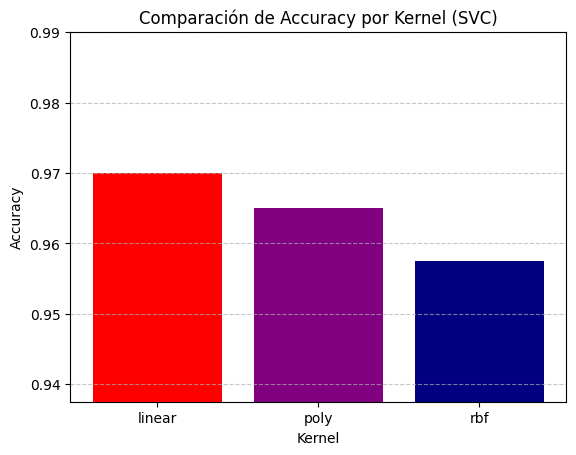

In [ ]:
# @title SVC (Support Vector Classifier)

def SVC_show_curve():
    acc = []
    kernels = ['linear', 'poly', 'rbf']

    for k in kernels:
        svc = SVC(kernel=k)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))

    plt.bar(kernels, acc, color=['red', 'purple', 'navy'])
    plt.xlabel("Kernel")
    plt.ylabel("Accuracy")
    plt.title("Comparación de Accuracy por Kernel (SVC)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    min_acc = min(acc)
    max_acc = max(acc)
    margin = 0.02
    plt.ylim(min_acc - margin, max_acc + margin)


SVC_show_curve()

## **CROSS VALIDATION**

In [ ]:
# @title Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


modeldt = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(modeldt, X_train, y_train, cv=5, scoring='accuracy')

print("\nResultados de Cross Validation:")
print(f"Scores individuales: {scores}")
print ("accuracy %.3f (+/- %.5f)"%(np.mean(scores), np.std(scores)))



Resultados de Cross Validation:
Scores individuales: [0.784375 0.815625 0.815625 0.815625 0.85    ]
accuracy 0.816 (+/- 0.02077)


#**PARTE 3: DEEP LEARNING**

In [ ]:
# @title MODELO 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(21)
tf.keras.utils.set_random_seed(21)
np.random.seed(21)

X= df.drop('price_range', axis=1)
y= df['price_range']
nc = df["price_range"].nunique()

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=21)

# y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=nc)
# y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=nc)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.flatten(input_shape=(X.shape[1]))
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(nc, activation='softmax')
])


model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model1.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=16, verbose=1)

test_loss, test_acc= model1.evaluate(X_test, y_test, verbose=1)

print("El accuracy es: ", test_acc)
print("El loss es: ", test_loss)
#print(nc)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.4113 - loss: 49.5517 - val_accuracy: 0.4938 - val_loss: 1.2341
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4938 - loss: 1.0874 - val_accuracy: 0.5500 - val_loss: 0.8551
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5259 - loss: 0.9648 - val_accuracy: 0.6625 - val_loss: 0.8038
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5273 - loss: 0.9541 - val_accuracy: 0.5125 - val_loss: 0.9723
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5414 - loss: 1.0701 - val_accuracy: 0.6625 - val_loss: 0.8051
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5960 - loss: 0.8482 - val_accuracy: 0.6375 - val_loss: 0.7756
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5632 - loss: 0.9511 - val_accuracy: 0.6625 - val_loss: 0.7122
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5454 - loss: 0.9214 - val_accuracy: 0.5500 - val_loss: 

In [ ]:
# @title MODELO 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(21)
tf.keras.utils.set_random_seed(21)
np.random.seed(21)

X= df.drop('price_range', axis=1)
y= df['price_range']
nc = df["price_range"].nunique()

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=21)

# y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=nc)
# y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=nc)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.flatten(input_shape=(X.shape[1]))
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(nc, activation='softmax')
])


model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model1.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=16, verbose=1)

test_loss, test_acc= model1.evaluate(X_test, y_test, verbose=1)

print("El accuracy es: ", test_acc)
print("El loss es: ", test_loss)
#print(nc)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.3956 - loss: 107.4882 - val_accuracy: 0.5688 - val_loss: 0.9932
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5381 - loss: 0.9918 - val_accuracy: 0.6313 - val_loss: 0.8068
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5996 - loss: 0.8863 - val_accuracy: 0.5938 - val_loss: 0.8310
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6044 - loss: 0.8077 - val_accuracy: 0.5750 - val_loss: 0.7854
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6675 - loss: 0.7194 - val_accuracy: 0.6562 - val_loss: 0.6457
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7095 - loss: 0.6816 - val_accuracy: 0.6125 - val_loss: 0.6585
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6699 - loss: 0.6977 - val_accuracy: 0.6250 - val_loss: 0.6195
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7034 - loss: 0.6353 - val_accuracy: 0.6375 - val_los

In [ ]:
# @title MODELO 3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(21)
tf.keras.utils.set_random_seed(21)
np.random.seed(21)

X= df.drop('price_range', axis=1)
y= df['price_range']
nc = df["price_range"].nunique()

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=21)

# y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=nc)
# y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=nc)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.flatten(input_shape=(X.shape[1]))
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(nc, activation='softmax')
])


model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model1.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=16, verbose=1)

test_loss, test_acc= model1.evaluate(X_test, y_test, verbose=1)

print("El accuracy es: ", test_acc)
print("El loss es: ", test_loss)
#print(nc)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3878 - loss: 90.7969 - val_accuracy: 0.5250 - val_loss: 0.9559
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4709 - loss: 1.1223 - val_accuracy: 0.4688 - val_loss: 1.0357
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4901 - loss: 1.0135 - val_accuracy: 0.5625 - val_loss: 0.8568
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5495 - loss: 0.8967 - val_accuracy: 0.5813 - val_loss: 0.8179
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5582 - loss: 0.8962 - val_accuracy: 0.6687 - val_loss: 0.7868
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5490 - loss: 0.8751 - val_accuracy: 0.5188 - val_loss: 0.8853
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5182 - loss: 1.0352 - val_accuracy: 0.3313 - val_loss: 1.2856
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3614 - loss: 1.2756 - val_accuracy: 0.4437 - val_loss: 1